# Workshop 3

## Diego Díaz Ayala

## A01770236

### 3.1 CHALLENGE - IS AMD MEAN RETURN HIGHER THAN INTEL MEAN RETURN

In [1]:
import yfinance as yf
import numpy as np
from datetime import datetime
from scipy import stats
import researchpy as rp

In [2]:
start_date = "2017-01-01"
end_date = "2022-08-15"


tickers = ['AMD', 'INTC']
data = yf.download(tickers, start=start_date, end=end_date, interval="1mo")['Adj Close']


[*********************100%***********************]  2 of 2 completed


In [3]:
returns = np.log(data) - np.log(data.shift(1))
returns = returns.dropna()

In [4]:

# Definir las hipótesis
# H0: (mean(rAMD) - mean(rINTEL)) = 0
# Ha: (mean(rAMD) - mean(rINTEL)) <> 0

# Calcular el error estándar de la diferencia de medias
N = returns['AMD'].count()
amdvar = returns['AMD'].var()
intelvar = returns['INTC'].var()
sediff = np.sqrt((1/N) * (amdvar + intelvar))

In [5]:
t = (returns['AMD'].mean() - returns['INTC'].mean()) / sediff

In [6]:
df = (((N-1) / N**2) * (amdvar + intelvar)**2  / ((amdvar/N)**2 + (intelvar/N)**2))
pvalue = 2 * stats.t.sf(np.abs(t), df)

In [8]:
t_stat, p_value_scipy = stats.ttest_ind(returns['AMD'], returns['INTC'], equal_var=False)


print("t-Estadístico (scipy):", t_stat)

t-Estadístico (scipy): 1.4260077923673296
Valor p (scipy): 0.15718174712174418


THE RULE OF THUMB TELLS US THAT WHEN THE T-STATISTICS IS GREATER THAN 2 WE HAVE STATISTICAL EVIDENCE TO REJECT THE NULL HYPOTHESIS OR AT LEAST AT THE 95% CONFIDENCE LEVEL. IN THIS CASE DE T-STATISTICAL IS 1.42 SO WE CAN´T REJECT OUR NULL HYPOTHESIS.

In [1]:
import numpy as np
import pandas as pd
import yfinance as yf
import matplotlib
import matplotlib.pyplot as plt

# We download price data for Microsoft and the S&P500 index:
prices=yf.download(tickers="MSFT ^GSPC", start="2019-01-01",interval="1mo")
# We select Adjusted closing prices and drop any row with NA values:
adjprices = prices['Adj Close'].dropna()

[*********************100%***********************]  2 of 2 completed


<Figure size 640x480 with 0 Axes>

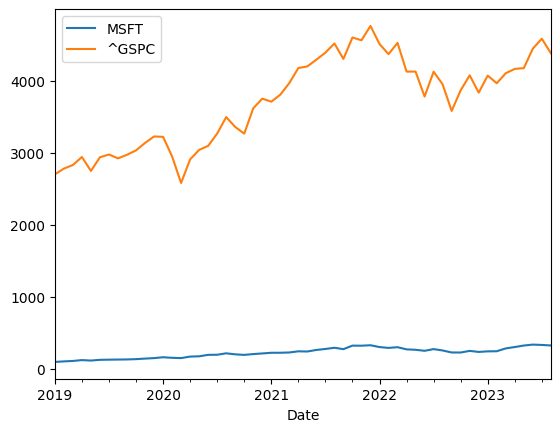

In [2]:
plt.clf()
adjprices.plot(y=['MSFT','^GSPC'])
plt.show()

In [3]:
adjprices['iMSFT'] = adjprices['MSFT'] / adjprices['MSFT'][0]
adjprices['iGSPC'] = adjprices['^GSPC'] / adjprices['^GSPC'][0]

<Figure size 640x480 with 0 Axes>

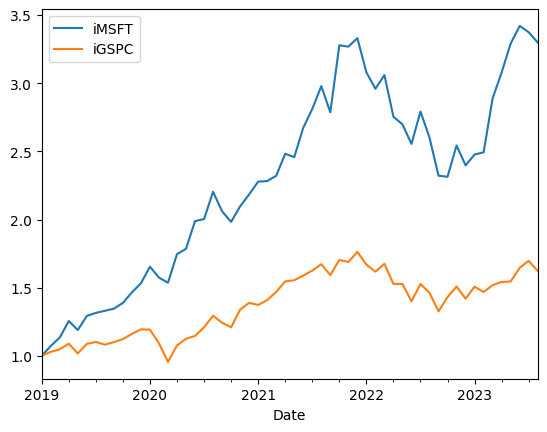

In [4]:
plt.clf()
adjprices.plot(y=['iMSFT','iGSPC'])
plt.show()

In [5]:
r = np.log(adjprices) - np.log(adjprices.shift(1))
# Dropping rows with NA values (the first month will have NAs)
r = r.dropna()
# Selecting only 2 columns (out of the 4 columns):
r = r[['MSFT','^GSPC']]
# Renameing the column names:
r.columns = ['MSFT','GSPC']

In [6]:
r.head()

,MSFT,GSPC
Date,,
2019-02-01,0.070250,0.029296
2019-03-01,0.055671,0.017766
2019-04-01,0.101963,0.038560
2019-05-01,-0.054442,-0.068041
2019-06-01,0.083539,0.066658


<Figure size 640x480 with 0 Axes>

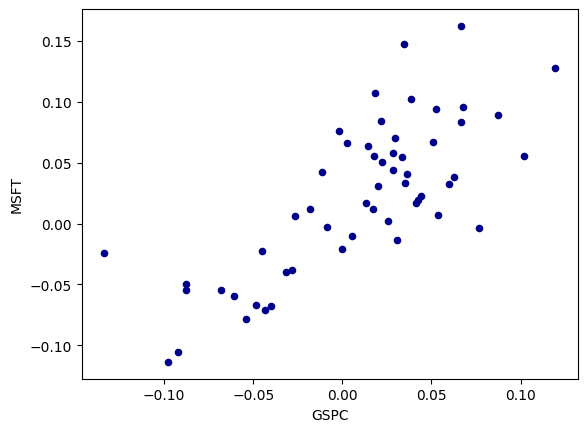

In [7]:
plt.clf()
r.plot.scatter(x='GSPC', y='MSFT',c='DarkBlue')
plt.show()

<Figure size 640x480 with 0 Axes>

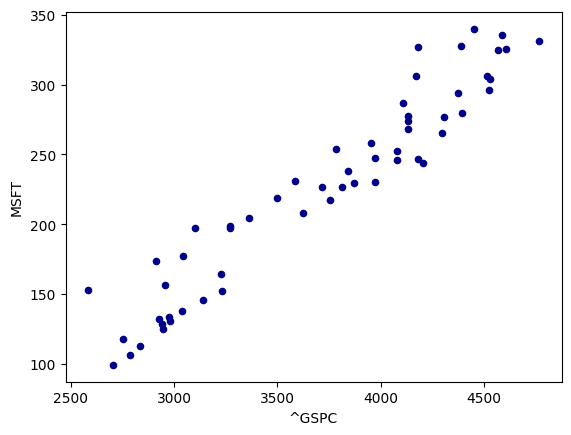

In [8]:
plt.clf()
adjprices.plot.scatter(x='^GSPC', y='MSFT',c='DarkBlue')
plt.show()

<Figure size 640x480 with 0 Axes>

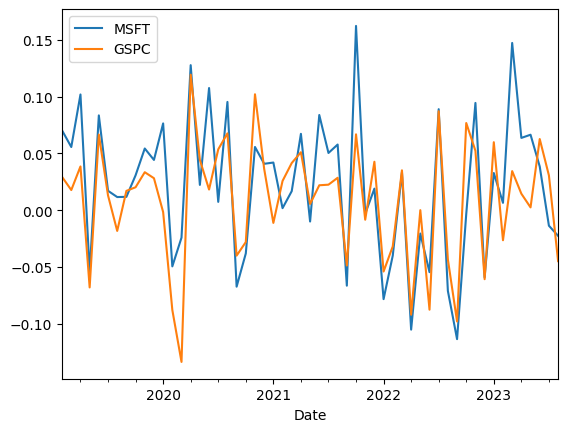

In [9]:
plt.clf()
r.plot(y=['MSFT','GSPC'])
plt.show()

In [10]:
msft_mean = r['MSFT'].mean()
gspc_mean = r['GSPC'].mean()
N = r['GSPC'].count()
sum_of_prod = ((r['MSFT'] - msft_mean) * (r['GSPC'] - gspc_mean) ).sum()  
cov = sum_of_prod / (N-1)
cov

0.002569057033844551

In [11]:
covm = np.cov(r['MSFT'],r['GSPC'])
covm

array([[0.00392621, 0.00256906],
       [0.00256906, 0.00287777]])

In [12]:
cov = covm[0,1]
cov

0.0025690570338445505

In [13]:
corr = np.corrcoef(r['MSFT'],r['GSPC'])
corr

array([[1.        , 0.76429138],
       [0.76429138, 1.        ]])

In [14]:
corr2 = cov / (r['MSFT'].std() * r['GSPC'].std())
corr2

0.7642913759031489

In [15]:
from scipy.stats import pearsonr
corr2 = pearsonr(r['MSFT'],r['GSPC'])
corr2

PearsonRResult(statistic=0.7642913759031491, pvalue=1.1248672468180008e-11)